In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from mat2list import EEG

In [2]:
data = scipy.io.loadmat("sampleEEGdata.mat")

eeg = EEG(data)

In [32]:
# Common average reference
cardata = np.zeros((eeg.eegdata.shape))

for trial in range(eeg.eegdata.shape[2]):
    for time in range(eeg.eegdata.shape[1]):
        cardata[:,time,trial] = eeg.eegdata[:,time,trial] - np.mean(eeg.eegdata[:,time,trial], keepdims=True)



In [76]:
# The variance time series
varEEG = np.var(np.mean(eeg.eegdata, axis=2), axis=0)
varAveRef = np.var(np.mean(cardata, axis=2), axis=0)

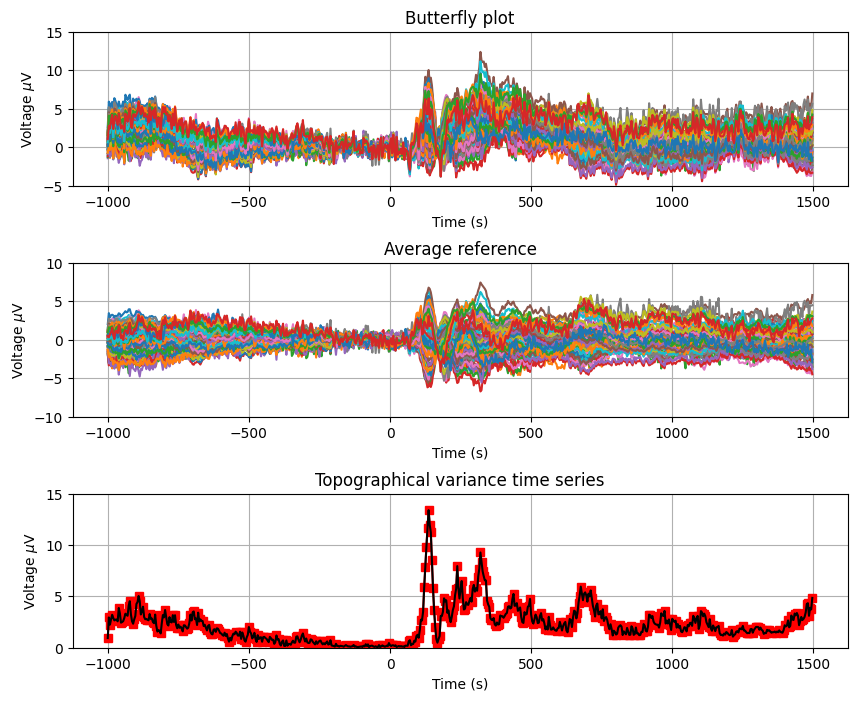

In [78]:
erp = np.mean(eeg.eegdata, axis=2)

plt.subplots(3,1,figsize=(10,8))
plt.subplots_adjust(hspace=0.5)  

plt.subplot(311)
plt.plot(eeg.eegtimes.T, erp.T)
plt.title("Butterfly plot")
plt.xlabel("Time (s)")
plt.ylabel("Voltage $\mu$V")
plt.ylim([-5,15])
plt.grid()

# average references
plt.subplot(312)
plt.plot(eeg.eegtimes.T, np.mean(cardata, axis=2).T)
plt.title("Average reference")
plt.xlabel("Time (s)")
plt.ylabel("Voltage $\mu$V")
plt.ylim([-10,10])
plt.grid()

# The variance time series
plt.subplot(313)
plt.plot(eeg.eegtimes.T, varEEG.T,"rs-")
plt.plot(eeg.eegtimes.T, varAveRef.T,"k-")
plt.title("Topographical variance time series")
plt.xlabel("Time (s)")
plt.ylabel("Voltage $\mu$V")
plt.ylim([0,15])
plt.grid()